Encontrar altura média do leito a partir de amostragem em quadrantes utilizando dados do LIGGGHTS (.vtk)

Por: Victor O. Ferreira
Em: 01/08/2020


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Nome da simulação

In [2]:
sim = "3-3-80"

Diretório no qual ficam guardadas as simulações

In [3]:
Dirsim = r"C:\Users\victo\OneDrive\Documentos\UFSCar\teste"

Raio do leito para testar os valores obtidos da importação (pode ser que na hora de importar os dados o ponto não seja reconhecido como separador decimal)

In [4]:
raio = 0.05

Tempo inicial, passo de tempo da simulação e tempo final da simulação

In [5]:
scl = 10**5 #fator multiplicador do tempo para encontrar valor igual ao do nome do documento
t0 = 10
dt = int(scl*5*10**(-2)) #Passo
t_max = 30

Número de partículas no leito

In [6]:
N = 8000

Número de partículas amostradas para cada quadrante (5% do número total de partículas dividido por 4 quadrantes)

In [7]:
amostra = int(N*0.05/4)

Criando array vazio "h" para por valores por iteração

In [8]:
h = []
AllData = pd.DataFrame(columns = ['x', 'y', 'z'])

Encontrando os valores:

Criando Dataframe da posição em todos os tempos:

In [9]:
for t in range(t0*scl, t_max*scl+dt,dt):
    txt = r"\liggghts_run" + str(t) + ".vtk"
    Data = pd.read_csv(Dirsim+txt, delimiter=" ", skiprows=5, header=None, nrows=N)
    Data.columns = ['x', 'y', 'z']
    AllData = AllData.append(Data, ignore_index=True)
    
    #Removendo partículas com posição fora do domínio (Caso haja)
    Data = Data[abs(Data.x) < raio]
    Data = Data[abs(Data.y) < raio]
    
    #Selecionando dados
    Posix = Data[Data['x'] > 0]
    Negax = Data[Data['x'] < 0]

    Quad1 = Posix[Posix['y'] > 0].nlargest(amostra, 'z')
    Quad2 = Negax[Negax['y'] > 0].nlargest(amostra, 'z')
    Quad3 = Negax[Negax['y'] < 0].nlargest(amostra, 'z')
    Quad4 = Posix[Posix['y'] < 0].nlargest(amostra, 'z')

    SumQuad = Quad1.append([Quad2,Quad3,Quad4])    
    
    #Encontrando as médias e desvios padrão
    ht = SumQuad['z'].mean(axis=0)
    h.append(ht)

Transformando dados obtidos em dataframe pandas

In [10]:
h = pd.DataFrame(h, columns = ['z'])

In [11]:
#Média:
h.mean(axis=0)

z    0.577824
dtype: float64

In [12]:
#Desvio Padrão
h.std(axis=0)

z    0.009184
dtype: float64

In [13]:
#Variância
h.var(axis=0)

z    0.000084
dtype: float64

Valores normalizados "z" para as alturas

In [14]:
z = (h - h.mean(axis=0))/h.std(axis=0)

Encontrando descrição completa dos dados z

In [15]:
z.describe()

,z
count,4.010000e+02
mean,-4.890519e-15
std,1.000000e+00
min,-3.096919e+00
25%,-5.558201e-01
50%,9.331232e-02
75%,6.648649e-01
max,2.254127e+00


Plotando um histograma:

array([[<AxesSubplot:title={'center':'z'}>]], dtype=object)

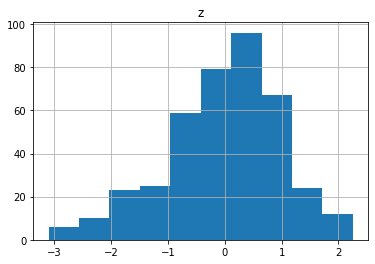

In [16]:
z.hist()

In [17]:
AllData.describe()

,x,y,z
count,3.208000e+06,3.208000e+06,3.208000e+06
mean,5.843779e-04,2.900100e-04,2.961321e-01
std,2.561386e-02,2.549965e-02,1.693631e-01
min,-4.702500e-02,-4.702500e-02,2.972400e-03
25%,-2.083830e-02,-2.092895e-02,1.526957e-01
50%,1.036990e-03,4.436635e-04,2.954025e-01
75%,2.203150e-02,2.160090e-02,4.409560e-01
max,4.702550e-02,4.702580e-02,6.553600e-01


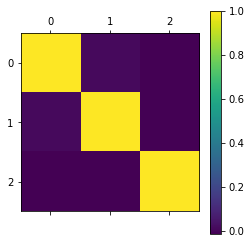

In [20]:
plt.matshow(AllData.corr())
plt.colorbar()

In [19]:
AllData

,x,y,z
0,-0.000535,-0.047003,0.002975
1,-0.017037,-0.043830,0.002975
2,-0.011257,-0.045241,0.002975
3,-0.022435,-0.041328,0.002975
4,-0.007664,-0.040331,0.002975
...,...,...,...
3207995,0.009488,0.042159,0.570001
3207996,0.005365,0.003541,0.571007
3207997,0.012764,0.022158,0.572600
3207998,0.000067,0.003965,0.360626
